In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os
import torch
import torchvision
import torch.nn as nn
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torch.nn.functional as F
import random
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
zip_path = '/content/drive/MyDrive/archive(1).zip'

In [4]:
path_to_data = '/content/data'

In [5]:
import zipfile
import os


zip_path = '/content/drive/MyDrive/archive(1).zip'
path_to_data = '/content/data'

# 1. Check if the file exists
if not os.path.exists(zip_path):
    print(f"Error: File not found at '{zip_path}'")
else:
    # 2. Check if the file is a valid ZIP archive
    try:
        with zipfile.ZipFile(zip_path, 'r') as zipf:
            print("File is a valid ZIP archive.")
            zipf.extractall(path_to_data)
    except zipfile.BadZipFile:
        print(f"Error: File '{zip_path}' is not a valid ZIP archive. It may be corrupted or a different file type.")

File is a valid ZIP archive.


In [6]:
train_path = '/content/data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [9]:
#define transformation pipeline
transform = transforms.Compose([
    transforms.Resize((256, 256)), #Resizing the image to 256 x 256 dimension
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [10]:
#Transforming the images into tensors
train = ImageFolder(train_path, transform=transform)
valid = ImageFolder(valid_path,transform=transform)

In [11]:
train[0]

(tensor([[[0.7098, 0.7176, 0.7255,  ..., 0.6471, 0.6510, 0.6549],
          [0.7176, 0.7216, 0.7294,  ..., 0.6588, 0.6627, 0.6667],
          [0.7255, 0.7294, 0.7373,  ..., 0.6588, 0.6627, 0.6667],
          ...,
          [0.4941, 0.4941, 0.4941,  ..., 0.4078, 0.4000, 0.3922],
          [0.4824, 0.4824, 0.4784,  ..., 0.4039, 0.4000, 0.3961],
          [0.4824, 0.4784, 0.4745,  ..., 0.4000, 0.4039, 0.4078]],
 
         [[0.6980, 0.7059, 0.7137,  ..., 0.6314, 0.6353, 0.6392],
          [0.7059, 0.7098, 0.7176,  ..., 0.6431, 0.6471, 0.6510],
          [0.7137, 0.7176, 0.7255,  ..., 0.6431, 0.6471, 0.6510],
          ...,
          [0.4314, 0.4314, 0.4314,  ..., 0.3686, 0.3608, 0.3529],
          [0.4196, 0.4196, 0.4157,  ..., 0.3647, 0.3608, 0.3569],
          [0.4196, 0.4157, 0.4118,  ..., 0.3608, 0.3647, 0.3686]],
 
         [[0.8118, 0.8196, 0.8275,  ..., 0.7608, 0.7647, 0.7686],
          [0.8196, 0.8235, 0.8314,  ..., 0.7725, 0.7765, 0.7804],
          [0.8275, 0.8314, 0.8392,  ...,

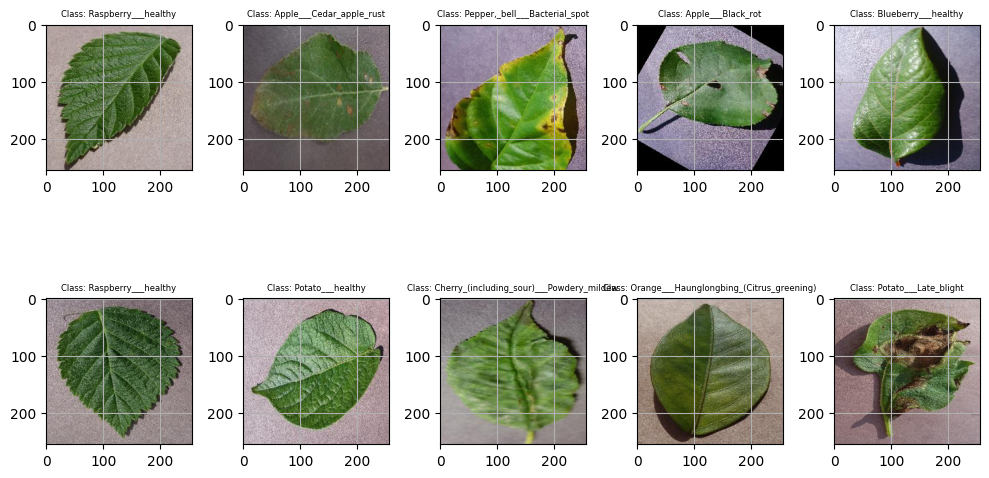

In [ ]:
#Exploration of training dataset images
fig, axes = plt.subplots(2, 5, figsize=(10, 6))

for i, ax in enumerate(axes.flat):
    r = random.randint(0,len(train))
    img, label = train[r]
    ax.imshow(img.permute(1,2,0))
    ax.grid(True)
    ax.set_title(f"Class: {train.classes[label]}",fontsize=6)

plt.tight_layout()
plt.show()

In [ ]:
list1 = {}
for i in range(len(train)):
  img, label = train[i]
  class_name = train.classes[label]
  if class_name in list1:
    list1[class_name] += 1
  else:
    list1[class_name] = 1


In [ ]:
#The various classes present and number of images in each class
df = pd.DataFrame(list(list1.items()), columns=['Class', 'Count'])
df

,Class,Count
0,Apple___Apple_scab,2016
1,Apple___Black_rot,1987
2,Apple___Cedar_apple_rust,1760
3,Apple___healthy,2008
4,Blueberry___healthy,1816
5,Cherry_(including_sour)___Powdery_mildew,1683
6,Cherry_(including_sour)___healthy,1826
7,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,1642
8,Corn_(maize)___Common_rust_,1907
9,Corn_(maize)___Northern_Leaf_Blight,1908


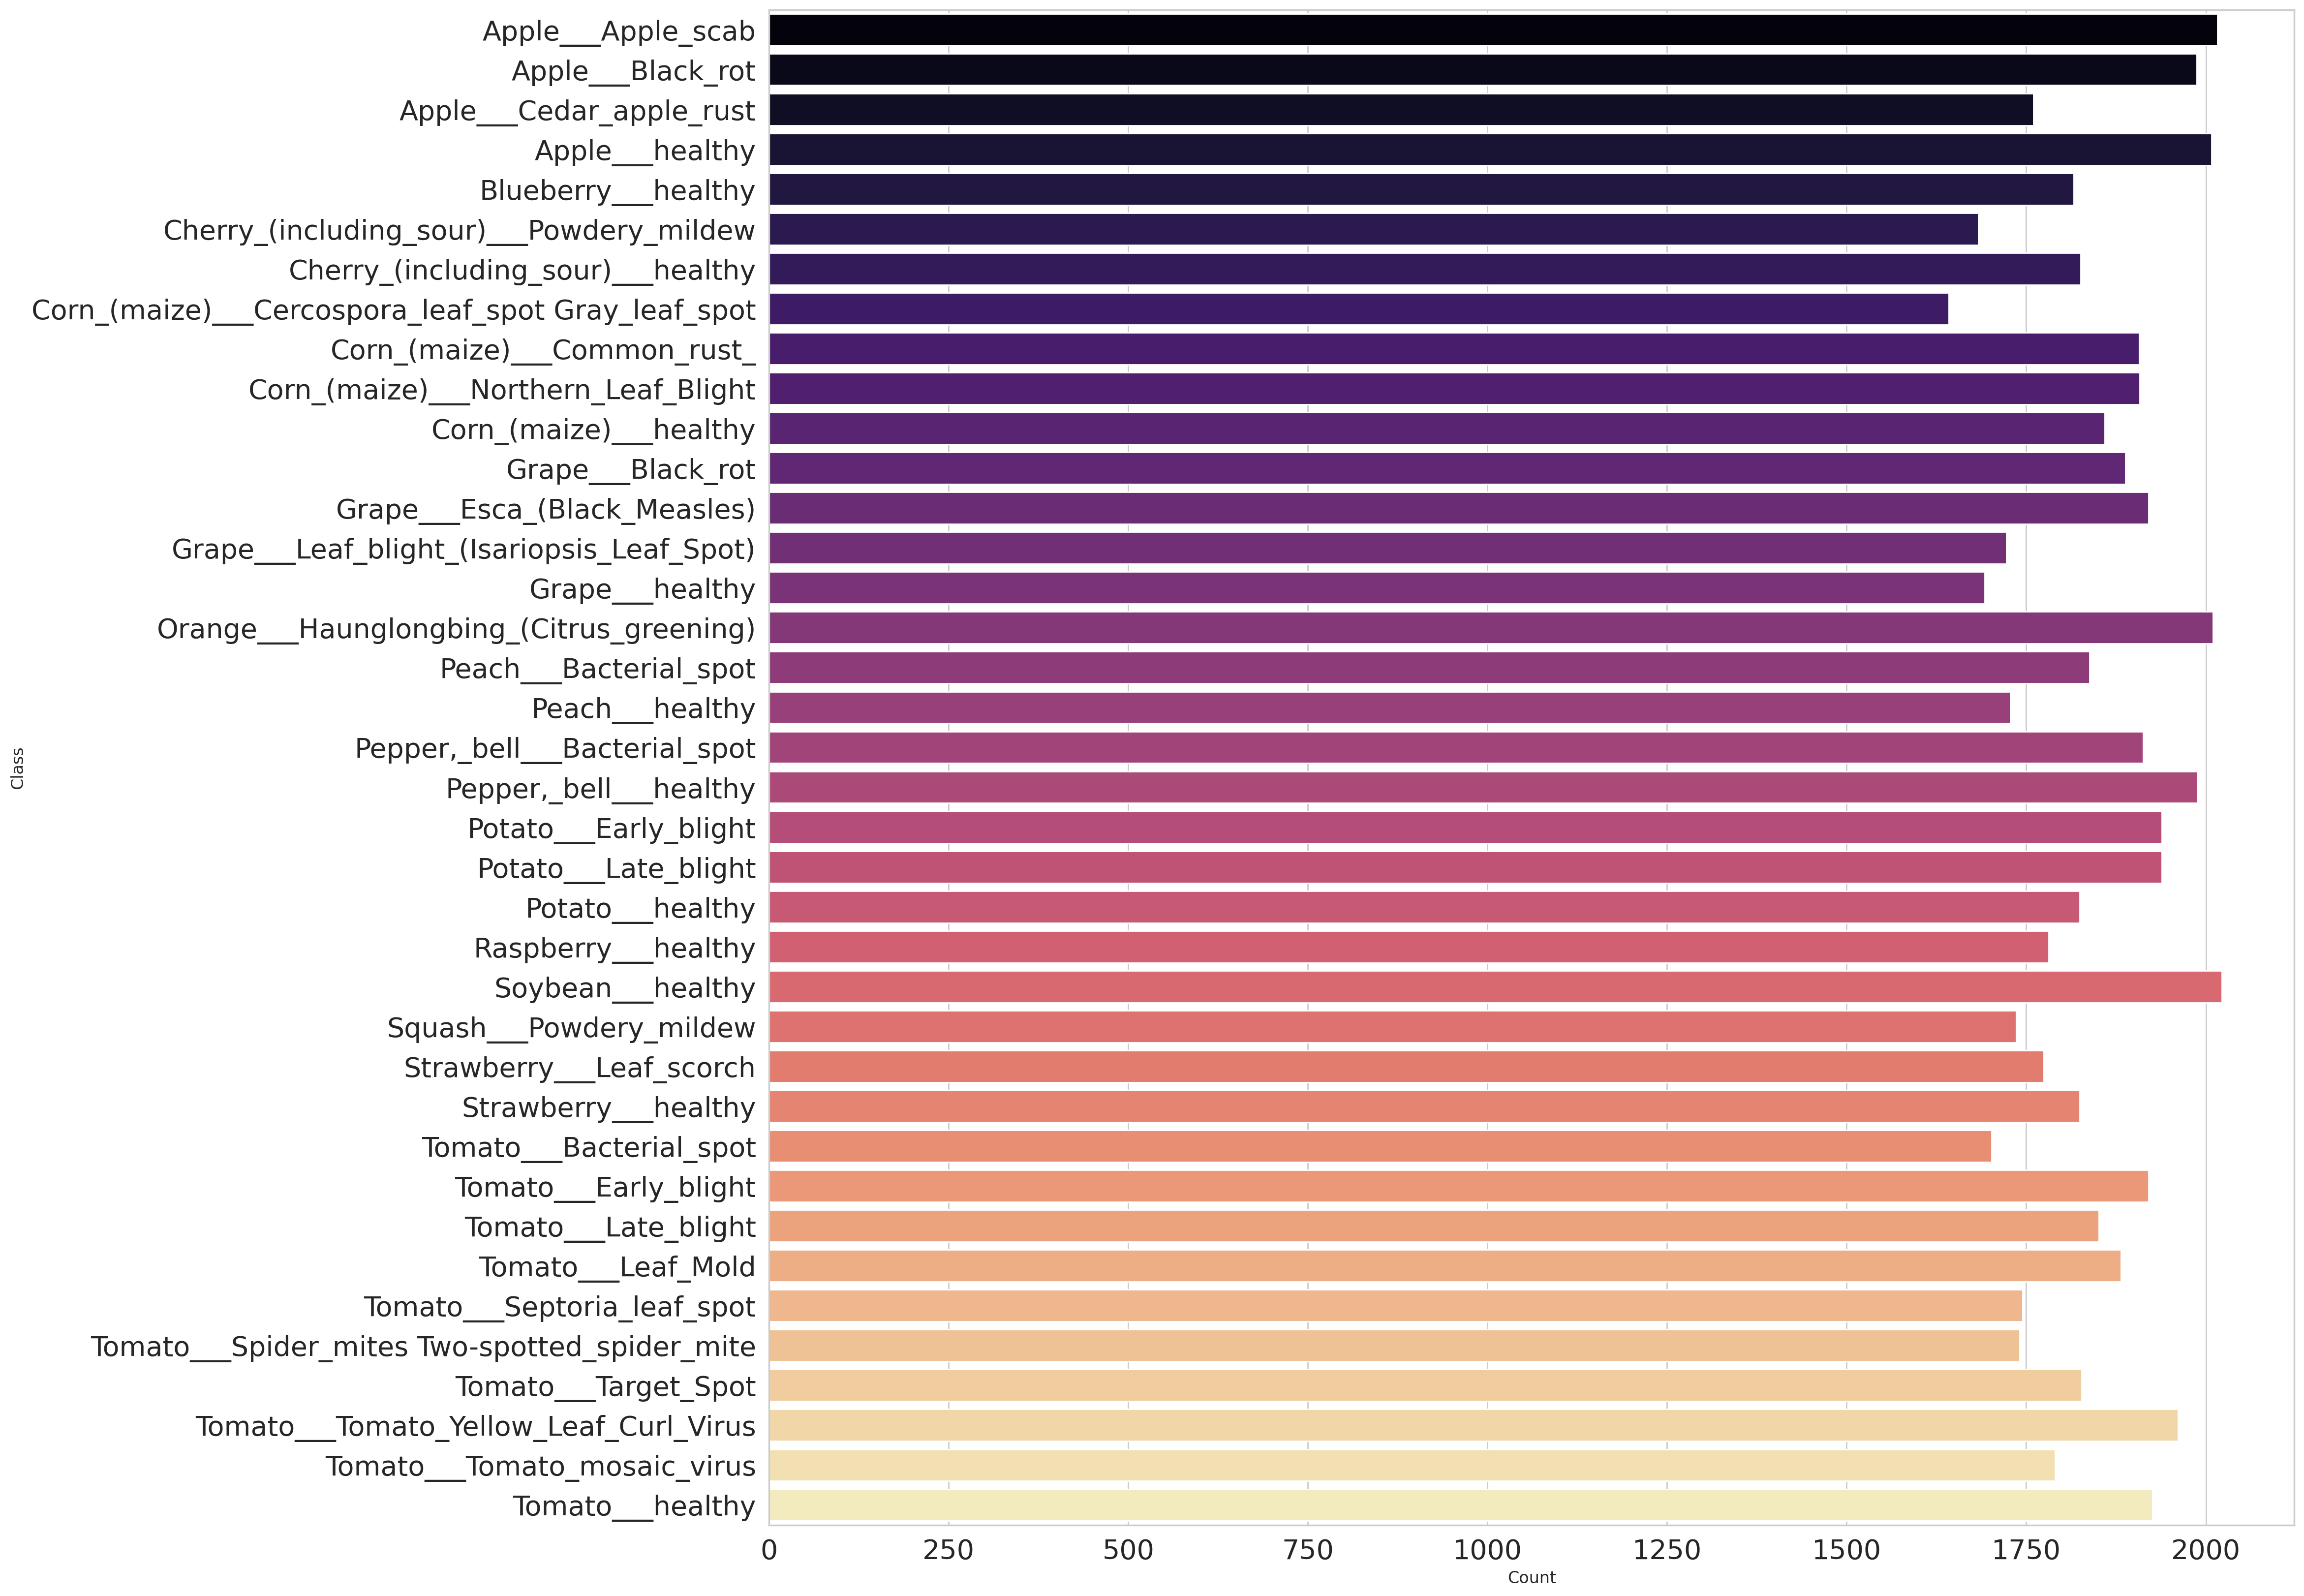

In [ ]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,20),dpi=200)
ax = sns.barplot(x= 'Count', y='Class',data=df, palette="magma",hue='Class',legend=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

###Since the dataset has already been divided into training, validation and testing sets therefore we don't need to run train_test_split on the dataset

In [12]:
train_loader = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid, batch_size=32, shuffle=True)

In [13]:
num_class = len(train.classes)

In [19]:
class ConvNet(nn.Module):
  def __init__(self, num_classes=38):
        super(ConvNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),  # Flatten the feature maps
            nn.Linear(256 * 32 * 32, 512),  # Adjust input size based on image dimensions
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),  # Add dropout for regularization
            nn.Linear(512, num_classes),
        )

  def forward(self, x):
      x = self.features(x)
      x = self.classifier(x)
      return x

# Instantiate the model



In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
learning_rate = 0.01
num_epochs=3

In [25]:
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1)%100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)


Epoch [1/3], Step [100/2197], Loss: 3.6247
Epoch [1/3], Step [200/2197], Loss: 3.5850
Epoch [1/3], Step [300/2197], Loss: 3.5750
Epoch [1/3], Step [400/2197], Loss: 3.5358
Epoch [1/3], Step [500/2197], Loss: 3.3846
Epoch [1/3], Step [600/2197], Loss: 2.8882
Epoch [1/3], Step [700/2197], Loss: 2.9648
Epoch [1/3], Step [800/2197], Loss: 2.5586
Epoch [1/3], Step [900/2197], Loss: 2.5396
Epoch [1/3], Step [1000/2197], Loss: 2.4209
Epoch [1/3], Step [1100/2197], Loss: 2.6404
Epoch [1/3], Step [1200/2197], Loss: 2.2394
Epoch [1/3], Step [1300/2197], Loss: 2.2257
Epoch [1/3], Step [1400/2197], Loss: 2.1059
Epoch [1/3], Step [1500/2197], Loss: 2.5433
Epoch [1/3], Step [1600/2197], Loss: 1.8694
Epoch [1/3], Step [1700/2197], Loss: 2.0516
Epoch [1/3], Step [1800/2197], Loss: 1.5218
Epoch [1/3], Step [1900/2197], Loss: 1.7813
Epoch [1/3], Step [2000/2197], Loss: 1.9165
Epoch [1/3], Step [2100/2197], Loss: 1.7648
Epoch [2/3], Step [100/2197], Loss: 1.6760
Epoch [2/3], Step [200/2197], Loss: 1.7137

In [26]:
from sklearn.metrics import confusion_matrix
import numpy as np

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in valid_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

conf_matrix = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[266  14   3 ...   0   7  28]
 [  4 320   1 ...   0  14  37]
 [  6   0 207 ...  22   5  30]
 ...
 [  1   0   1 ... 377   3   0]
 [  0   0   0 ...   0 398  27]
 [  1   0   0 ...   0   0 474]]


In [27]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(all_labels, all_preds, target_names=train.classes))

Classification Report:

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.78      0.53      0.63       504
                                 Apple___Black_rot       0.75      0.64      0.69       497
                          Apple___Cedar_apple_rust       0.89      0.47      0.62       440
                                   Apple___healthy       0.52      0.78      0.62       502
                               Blueberry___healthy       0.69      0.76      0.72       454
          Cherry_(including_sour)___Powdery_mildew       0.87      0.76      0.81       421
                 Cherry_(including_sour)___healthy       0.95      0.71      0.82       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.77      0.68      0.72       410
                       Corn_(maize)___Common_rust_       0.89      0.99      0.94       477
               Corn_(maize)___Northern_Leaf_Blight     